In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import stats

In [2]:
patients_data=pd.read_csv('/content/drive/MyDrive/indian_liver_patient.csv')
patients_data.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [3]:
patients_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [4]:
patients_data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [10]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [11]:
mean_ratio = patients_data['Albumin_and_Globulin_Ratio'].mean()
mean_ratio


0.9470639032815197

In [12]:
patients_data = patients_data.fillna(mean_ratio)

In [13]:
patients_data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
patients_data['Gender']=lc.fit_transform(patients_data['Gender'])


In [15]:
patients_data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


<ipython-input-16-f014506a4cb7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(patients_data['Age'])


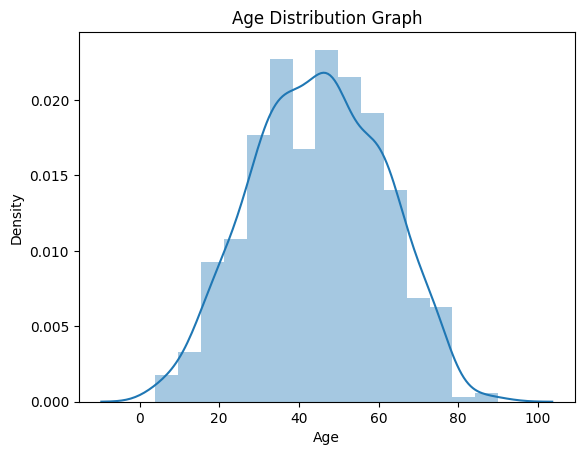

In [16]:
sns.distplot(patients_data['Age'])
plt.title('Age Distribution Graph')
plt.show()

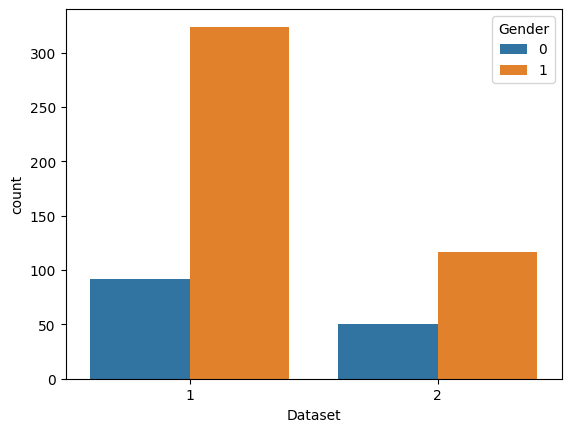

In [9]:
sns.countplot(x=patients_data['Dataset'],hue=patients_data['Gender'])
plt.show()

<Axes: >

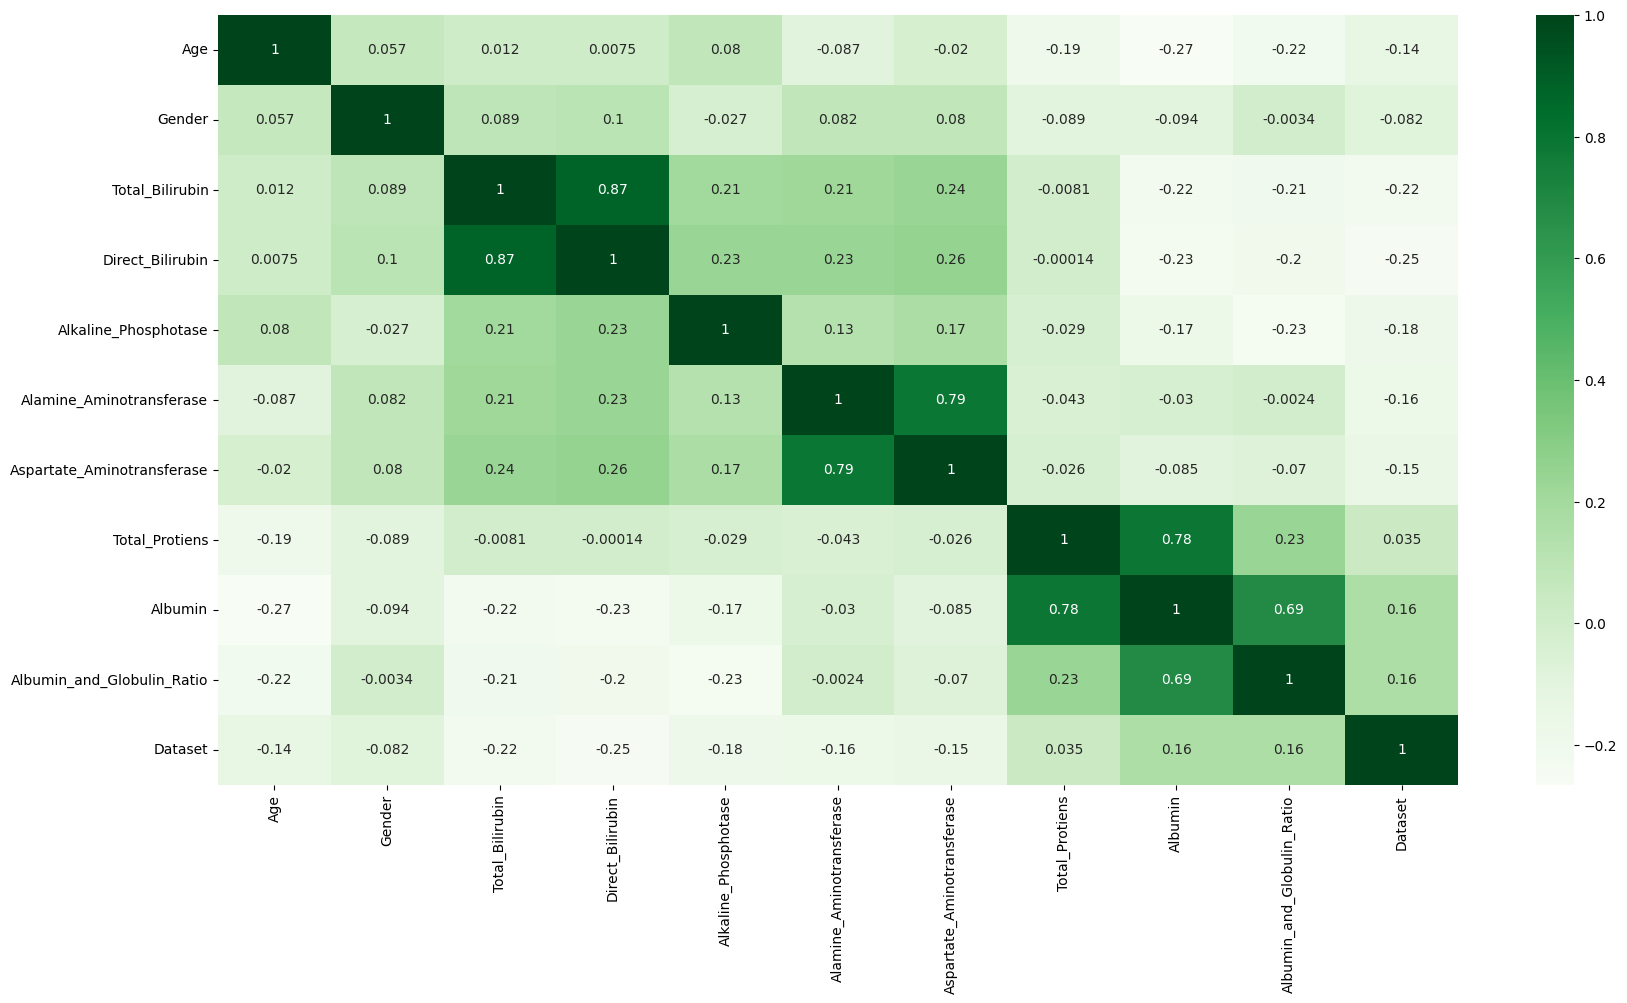

In [17]:
corr=patients_data.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

In [18]:
# changing the column name
patients_data.rename(columns={'Dataset': 'Diagnosis', 'Total_Protiens': 'Total_Proteins'}, inplace=True)

In [19]:
X = patients_data.drop('Diagnosis', axis=1)
y = patients_data['Diagnosis']

In [20]:
from sklearn.preprocessing import StandardScaler

# Scaling the feature columns
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [21]:
X_scaled

array([[ 1.25209764, -1.76228085, -0.41887783, ...,  0.29211961,
         0.19896867, -0.14789798],
       [ 1.06663704,  0.56744644,  1.22517135, ...,  0.93756634,
         0.07315659, -0.65069686],
       [ 1.06663704,  0.56744644,  0.6449187 , ...,  0.47653296,
         0.19896867, -0.17932291],
       ...,
       [ 0.44843504,  0.56744644, -0.4027597 , ..., -0.0767071 ,
         0.07315659,  0.16635131],
       [-0.84978917,  0.56744644, -0.32216906, ...,  0.29211961,
         0.32478075,  0.16635131],
       [-0.41704777,  0.56744644, -0.37052344, ...,  0.75315299,
         1.58290153,  1.73759779]])

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [24]:
y_train.value_counts()

1    329
2    137
Name: Diagnosis, dtype: int64

In [25]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [26]:
y_train_smote.value_counts()

1    329
2    329
Name: Diagnosis, dtype: int64

In [27]:

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier()
model1.fit(X_train_smote, y_train_smote)
y_pred = model1.predict(X_test)
rcf=accuracy_score(y_test,y_pred)
rcf
pd.crosstab(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.81      0.78      0.80        87
           2       0.42      0.47      0.44        30

    accuracy                           0.70       117
   macro avg       0.62      0.62      0.62       117
weighted avg       0.71      0.70      0.71       117



In [28]:
from sklearn.tree import DecisionTreeClassifier 
model4=DecisionTreeClassifier()
model4.fit(X_train_smote, y_train_smote)
y_predict=model4.predict(X_test) 
dtc1=accuracy_score (y_test, y_predict) 
dtc1
pd.crosstab(y_test, y_predict) 
print(classification_report (y_test, y_predict))



              precision    recall  f1-score   support

           1       0.79      0.71      0.75        87
           2       0.36      0.47      0.41        30

    accuracy                           0.65       117
   macro avg       0.58      0.59      0.58       117
weighted avg       0.68      0.65      0.66       117



In [29]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier()
model2.fit(X_train_smote, y_train_smote)
y_predict=model2.predict(X_test) 
knn1=(accuracy_score (y_test, y_predict))
knn1
pd.crosstab(y_test, y_predict) 
print (classification_report (y_test, y_predict))

              precision    recall  f1-score   support

           1       0.81      0.66      0.73        87
           2       0.36      0.57      0.44        30

    accuracy                           0.63       117
   macro avg       0.59      0.61      0.58       117
weighted avg       0.70      0.63      0.65       117



In [33]:

from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train_smote, y_train_smote)
y_predict=model5.predict(X_test)
logi1=accuracy_score (y_test, y_predict)
logi1
pd.crosstab(y_test,y_predict)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           1       0.95      0.64      0.77        87
           2       0.47      0.90      0.61        30

    accuracy                           0.71       117
   macro avg       0.71      0.77      0.69       117
weighted avg       0.83      0.71      0.73       117



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense (units=100, activation='relu', input_dim=10))
#Adding the second hidden Layer 
classifier.add(Dense (units=50, activation='relu'))
# Adding the output Layer
classifier.add(Dense (units=1, activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
model_history=classifier.fit(X_train,y_train,batch_size=100,validation_split=0.2,epochs=5)

Epoch 1/5
4/4 [==============================] - 2s 134ms/step - loss: 12.6757 - accuracy: 0.2849 - val_loss: -4.0204 - val_accuracy: 0.7234
Epoch 2/5
4/4 [==============================] - 0s 17ms/step - loss: -7.3430 - accuracy: 0.7016 - val_loss: -10.8675 - val_accuracy: 0.7234
Epoch 3/5
4/4 [==============================] - 0s 23ms/step - loss: -14.2048 - accuracy: 0.7016 - val_loss: -17.6010 - val_accuracy: 0.7234
Epoch 4/5
4/4 [==============================] - 0s 18ms/step - loss: -22.5269 - accuracy: 0.7016 - val_loss: -24.3420 - val_accuracy: 0.7234
Epoch 5/5
4/4 [==============================] - 0s 24ms/step - loss: -30.3158 - accuracy: 0.7016 - val_loss: -31.4223 - val_accuracy: 0.7234


In [43]:
classifier.save("liver.h5")

In [44]:
y_pred=classifier.predict(X_test)

4/4 [==============================] - 0s 3ms/step


In [45]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [46]:
y_pred=(y_pred>0.5)
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [47]:
model5.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [48]:
model1.predict([[50,1,1.2,0.8,150,70,80,7.2,3.4,0.8]])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [49]:
acc_smote= [['KNN Classifier', knn1], ['RandomForestClassifier',rcf ],['DecisionTreeClassifier',dtc1],['LogisticRegression',logi1]]

Liverpatient_pred= pd.DataFrame(acc_smote, columns = ['classification_models', 'accuracy_score'])
Liverpatient_pred

,classification_models,accuracy_score
0,KNN Classifier,0.632479
1,RandomForestClassifier,0.700855
2,DecisionTreeClassifier,0.649573
3,LogisticRegression,0.709402


<Axes: title={'center': 'Classification models & accuracy scores after SMOTE'}, xlabel='classification_models', ylabel='accuracy_score'>

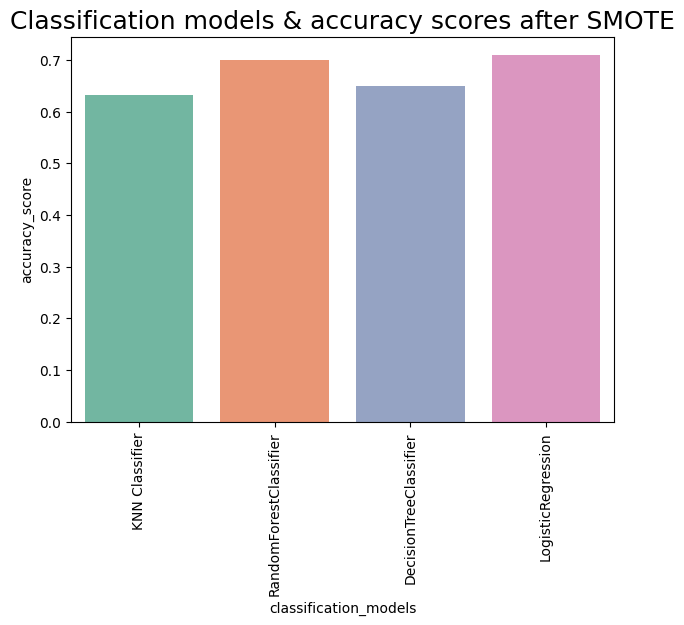

In [50]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
plt.title('Classification models & accuracy scores after SMOTE',fontsize=18)
sns.barplot(x='classification_models',y="accuracy_score",data=Liverpatient_pred,palette="Set2")


In [51]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [52]:
model.feature_importances_

array([0.12018653, 0.02246013, 0.11383896, 0.10264531, 0.12026509,
       0.10970035, 0.11735463, 0.09322404, 0.10023719, 0.10008777])

In [53]:
dd=pd.DataFrame(model.feature_importances_,index=X.columns).sort_values(0,ascending=False)
dd

,0
Alkaline_Phosphotase,0.120265
Age,0.120187
Aspartate_Aminotransferase,0.117355
Total_Bilirubin,0.113839
Alamine_Aminotransferase,0.109700
Direct_Bilirubin,0.102645
Albumin,0.100237
Albumin_and_Globulin_Ratio,0.100088
Total_Proteins,0.093224
Gender,0.022460


Text(0.5, 1.0, 'FEATURE IMPORTANCE')

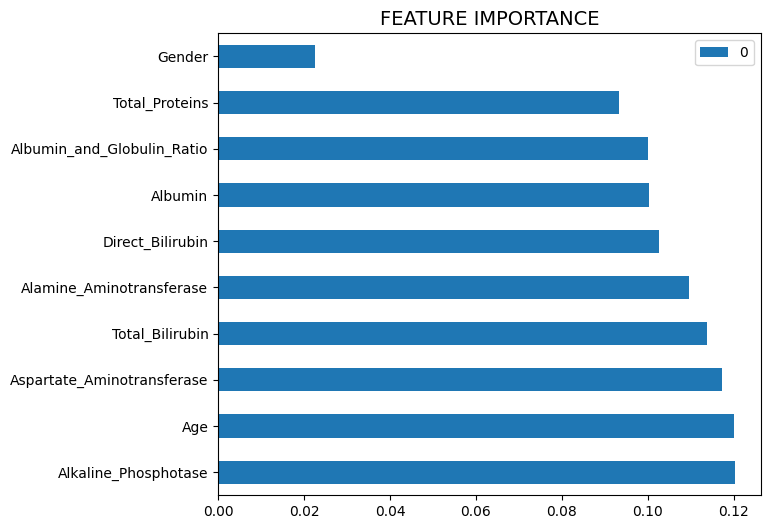

In [54]:
dd.plot(kind='barh',figsize=(7,6))
plt.title("FEATURE IMPORTANCE",fontsize=14)

In [55]:
import joblib
joblib.dump(classifier,'ETC.pkl')

['ETC.pkl']

In [56]:
value = {'Age': 72, 
        'Gender': 0, 
        'Total_Bilirubin': 0.6, 
        'Direct_Bilirubin': 0.1, 
        'Alkaline_Phosphotase': 122, 
        'Alamine_Aminotransferase': 22, 
        'Aspartate_Aminotransferase': 19,
        'Total_Proteins': 8.9, 
        'Albumin': 4.9, 
        'Albumin_and_Globulin_Ratio': 1.2}

In [57]:
data = pd.DataFrame([value])
data

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio
0,72,0,0.6,0.1,122,22,19,8.9,4.9,1.2


In [58]:
p=classifier.predict(data)
if p[0]==0:
  print("No Disease")
else:
    print("Disease")

1/1 [==============================] - 0s 93ms/step
Disease


In [ ]:
from flask import Flask, render_template, request
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('ETC.pkl')

@app.route('/')
def home():
    return render_template('home.html')

@app.route('/result', methods=['POST'])
def predict():
    int_features = [float(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    if prediction == 1:
        output = 'Liver disease is present'
    else:
        output = 'Liver disease is not present'

    return render_template('home.html', prediction_text=output)

if __name__ == "__main__":
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
